In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_fd7a3fcd2dda49b8a8f8507ca635f81e = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_fd7a3fcd2dda49b8a8f8507ca635f81e = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_fd7a3fcd2dda49b8a8f8507ca635f81e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mC4kc4LdEW6OWYmTQeOm1c9f0kojBxlGkwftfpWJ_pUT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_fd7a3fcd2dda49b8a8f8507ca635f81e)

body = client_fd7a3fcd2dda49b8a8f8507ca635f81e.get_object(Bucket='minorproject-donotdelete-pr-fyphfcxvpxslbo',Key='parkinsons_updrs.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_OG = pd.read_csv(body)
df_OG.head()


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [2]:
df_OG.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [3]:
df_OG.shape

(5875, 22)

In [4]:
#df_OG['sex'].value_counts()
#df_OG.groupby('sex')['subject#'].count()
#df_OG['subject#'].value_counts()

In [5]:
df=df_OG.copy()
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [6]:
df['UPDRS']=df['total_UPDRS']
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,UPDRS
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375


In [7]:
df.drop(['total_UPDRS'], axis=1, inplace=True)
df.drop(['subject#'],axis=1,inplace=True)
df.head()

,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,UPDRS
0,72,0,5.6431,28.199,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,72,0,12.6660,28.447,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,72,0,19.6810,28.695,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,72,0,25.6470,28.905,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,72,0,33.6420,29.187,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375


In [8]:
df.isnull().sum().sort_values(ascending=False)

UPDRS            0
Shimmer          0
sex              0
test_time        0
motor_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer(dB)      0
PPE              0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
age              0
dtype: int64

In [9]:
df.describe()

,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,UPDRS
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,0.317787,92.863722,21.296229,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,...,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589,29.018942
std,8.821524,0.465656,53.445602,8.129282,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,...,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498,10.700283
min,36.000000,0.000000,-4.262500,5.037700,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,...,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983,7.000000
25%,58.000000,0.000000,46.847500,15.000000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,...,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340,21.371000
50%,65.000000,0.000000,91.523000,20.871000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,...,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500,27.576000
75%,72.000000,1.000000,138.445000,27.596500,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,...,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490,36.399000
max,85.000000,1.000000,215.490000,39.511000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,...,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730,54.992000


In [10]:
df.dtypes

age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
UPDRS            float64
dtype: object

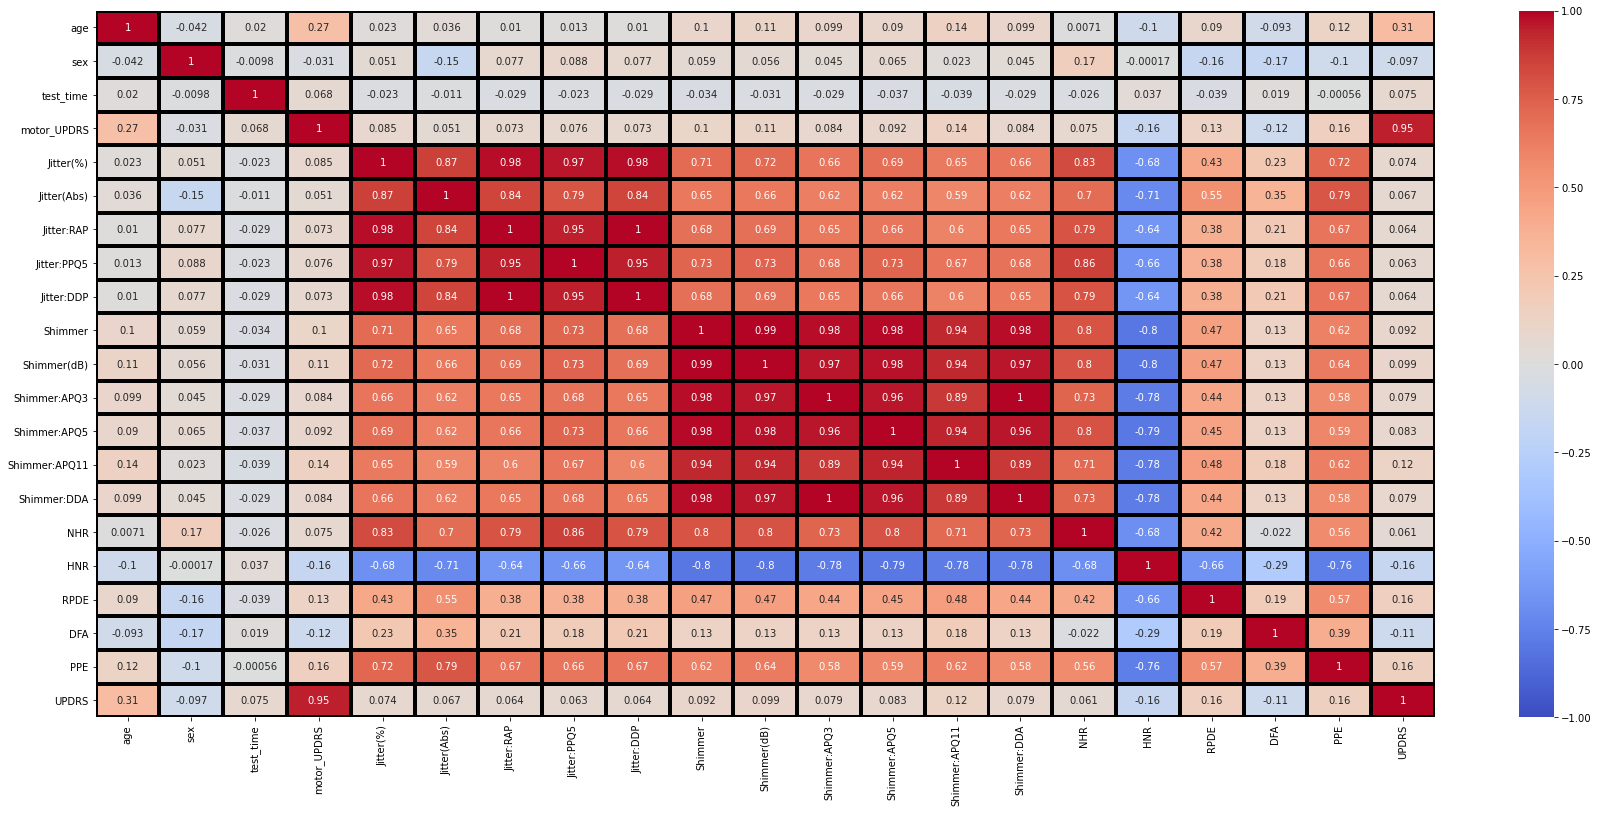

In [11]:
#df1=df[df.columns[1:]].corr()['UPDRS']
plt.figure(figsize=(30,13))
heatmap=sns.heatmap(df.corr(), annot=True, cmap='coolwarm',vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black')

In [12]:
df1=df.copy()
df1.drop(['motor_UPDRS'], axis=1, inplace=True)
df1.head()
df1.tail()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,UPDRS
5870,61,0,142.79,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367,33.485
5871,61,0,149.84,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621,32.988
5872,61,0,156.82,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157,32.495
5873,61,0,163.73,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204,32.007
5874,61,0,170.73,0.00282,0.000021,0.00135,0.00166,0.00406,0.01907,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336,31.513


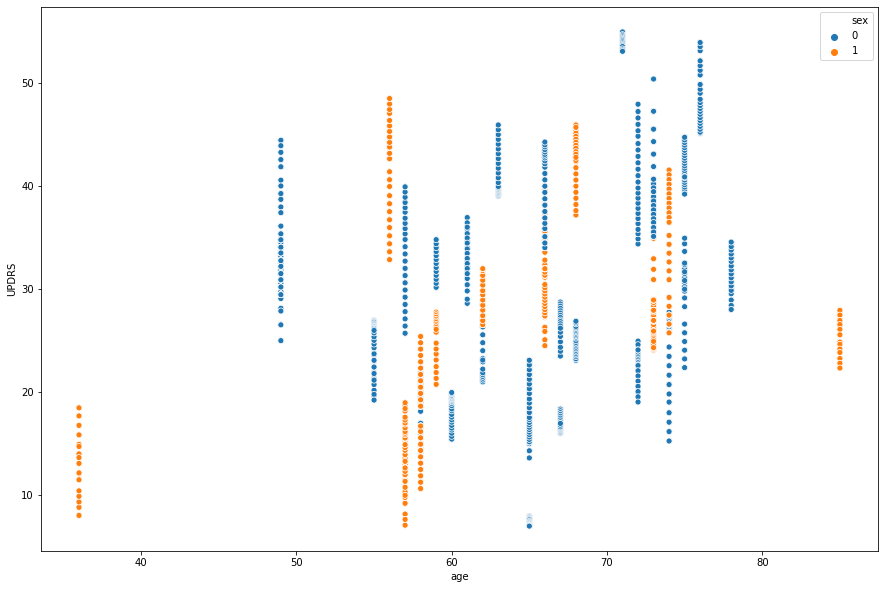

In [13]:
plt.figure(figsize=(15,10))
sns.scatterplot(df1['age'],df1['UPDRS'], hue=df1['sex'])

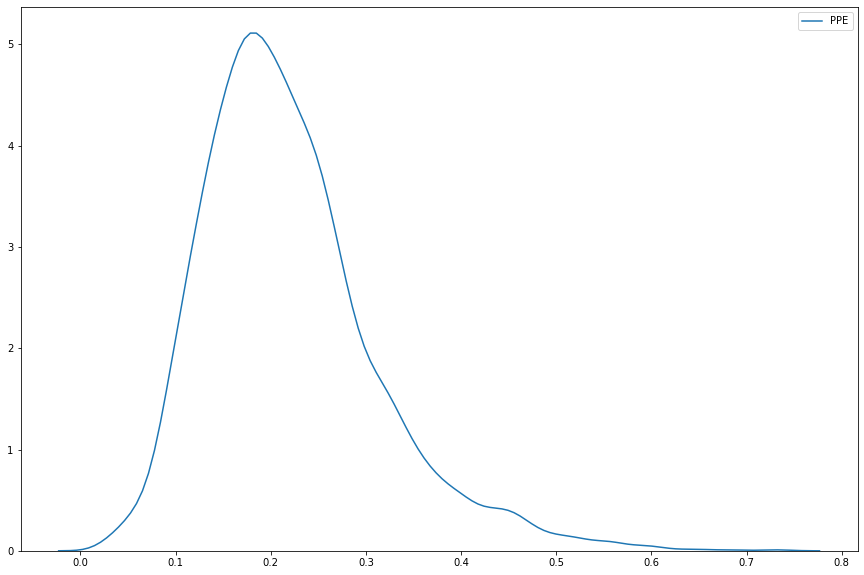

In [14]:
plt.figure(figsize=(15,10))
#sns.distplot(df['UPDRS'], hist=False)
sns.kdeplot(df['PPE'])
#Add here 2 plots of ppe, one for parkinsons and no parkinsons

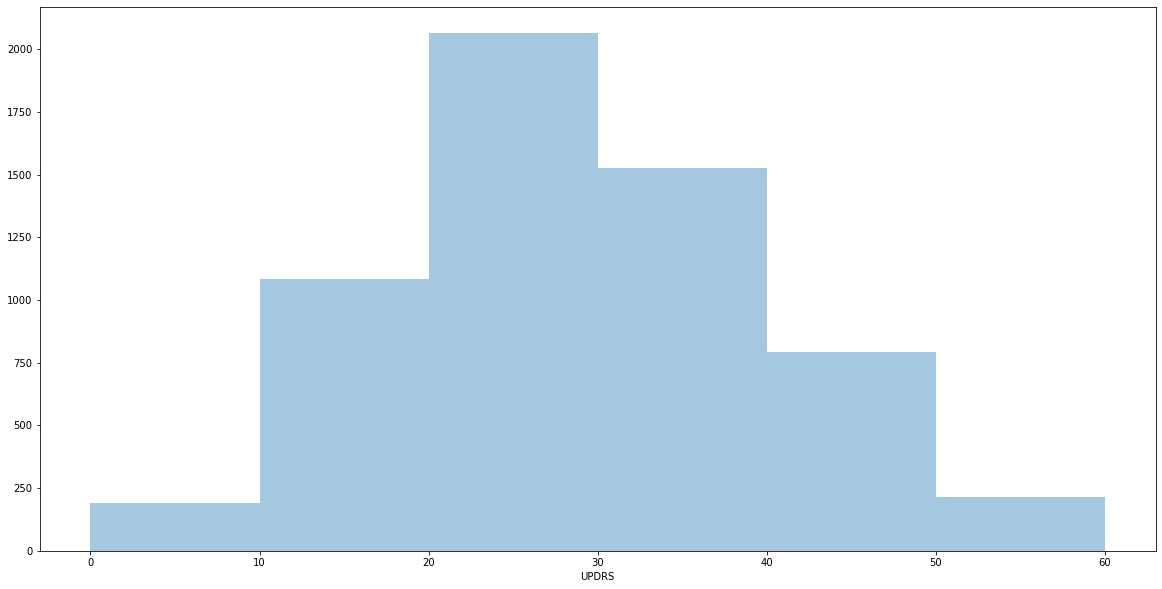

In [15]:
plt.figure(figsize=(20,10))
sns.distplot(df1['UPDRS'],bins=np.arange(0,70,10),kde=False)

# SVM

In [16]:
x_data=df.iloc[:,0:-1].values
xdf=df.iloc[:,0:-2]
y_data=df.iloc[:,-1].values

In [17]:
from sklearn.model_selection import train_test_split
  
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 1)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
scaler=MinMaxScaler(feature_range=(0,3)) #Customer range ka transformer
y_test = y_test.reshape(-1, 1)# Converting 1D to something coz compiler giving BT
y_train = y_train.reshape(-1, 1)
x_train = sc.fit_transform(x_train)#standard transform
x_test = sc.transform(x_test)
y_test=scaler.fit_transform(y_test)
y_train=scaler.fit_transform(y_train) #Custom transform
y_train=np.around(y_train,0) #Round off 1.2 to 1, 2.7 ko 3 etc
y_test=np.around(y_test,0)
y_train=y_train.astype(int)
y_test=y_test.astype(int)
y_train.max()#Bas testing
y_train

array([[3],
       [2],
       [1],
       ...,
       [2],
       [0],
       [1]])

In [19]:
#from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler(feature_range=(0, 3))
#y_test=scaler.fit_transform(y_test)
#y_train=scaler.fit_transform(y_train)
y_train=y_train.flatten() #Converting to 1D array coz SVC deals 1D array 
y_test=y_test.flatten() 
y_train

array([3, 2, 1, ..., 2, 0, 1])

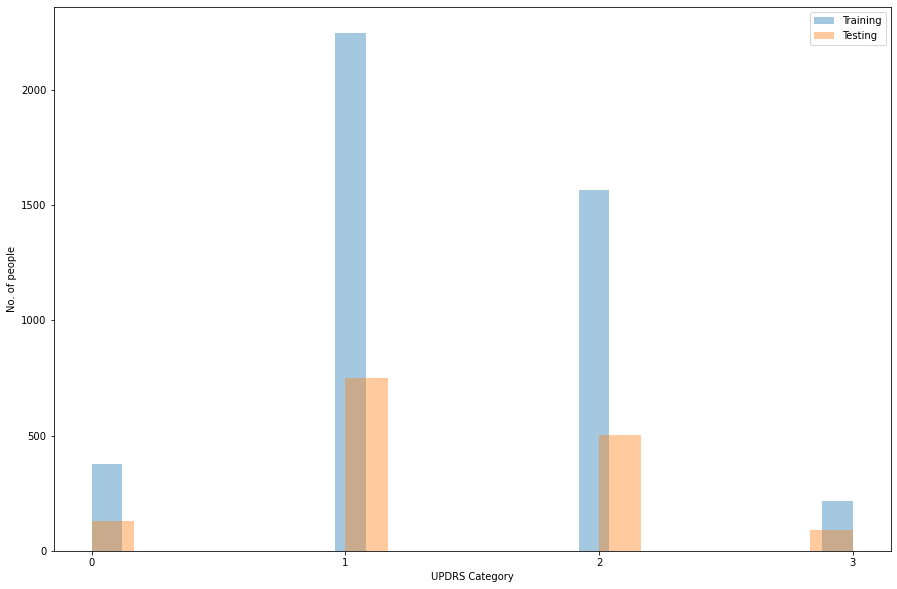

In [20]:
plt.figure(figsize=(15,10))
sns.distplot(y_train, kde=False)
sns.distplot(y_test, kde=False)
plt.xlabel("UPDRS Category")
plt.ylabel("No. of people")
plt.xticks([0,1,2,3])
plt.legend(labels=['Training', 'Testing'])

In [21]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='poly', degree=3, C=100)  #Tuning parameters
classifier.fit(x_train, y_train)
pred=classifier.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9489448604492853

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[122,   9,   0,   0],
       [  7, 714,  27,   0],
       [  0,  17, 478,   6],
       [  0,   0,   9,  80]])

<Figure size 1080x720 with 0 Axes>

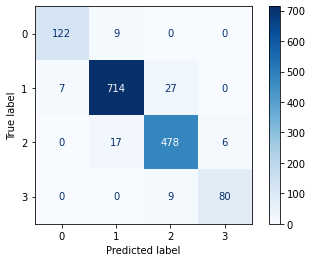

In [24]:
from sklearn.metrics import plot_confusion_matrix

plt.figure(figsize=(15,10))
plot_confusion_matrix(classifier, x_test, y_test, cmap='Blues')

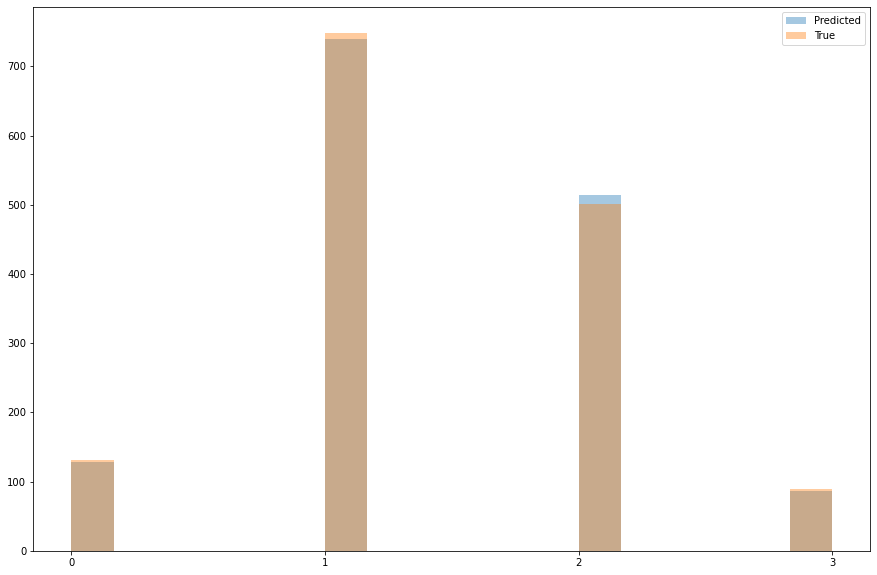

In [25]:
plt.figure(figsize=(15,10))
sns.distplot(pred, kde=False)
sns.distplot(y_test, kde=False)
plt.xticks([0,1,2,3])
plt.legend(labels=['Predicted', 'True'])

#  Decision Tree

In [ ]:
x_data=df.iloc[:,0:-1].values
xdf=df.iloc[:,0:-2]
y_data=df.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 1)
print(y_test)

In [ ]:
sc = StandardScaler()
scaler=MinMaxScaler(feature_range=(0,3))
y_test = y_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_test=scaler.fit_transform(y_test)
y_train=scaler.fit_transform(y_train)
y_train=np.around(y_train,0)
y_test=np.around(y_test,0)
y_train=y_train.astype(int)
y_test=y_test.astype(int)
y_train=y_train.flatten()
y_test=y_test.flatten() 
y_train
y_train.shape

In [ ]:
from sklearn.tree import DecisionTreeRegressor

clfDF = DecisionTreeRegressor(random_state=1)
 
clfDF.fit(x_train, y_train)

In [ ]:
pred = clfDF.predict(x_test)
print("Score is",accuracy_score(y_test,pred))

In [ ]:
#plot_confusion_matrix(clfDF, x_test, y_test)

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(pred, kde=False)
sns.distplot(y_test, kde=False)
plt.xticks([0,1,2,3])
plt.legend(labels=['Predicted', 'True'])

In [ ]:
pred

<B><h2>Decision Tree Classifier</h2></B>

In [26]:
x_data=df.iloc[:,0:-1].values
xdf=df.iloc[:,0:-2]
y_data=df.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 1)
print(y_test)

[26.23  26.23  20.867 ... 40.822 35.564 32.84 ]


In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=2)

In [28]:
sc = StandardScaler()
scaler=MinMaxScaler(feature_range=(0,3))
y_test = y_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_test=scaler.fit_transform(y_test)
y_train=scaler.fit_transform(y_train)
y_train=np.around(y_train,0)
y_test=np.around(y_test,0)
y_train=y_train.astype(int)
y_test=y_test.astype(int)
y_train=y_train.flatten()
y_test=y_test.flatten() 
y_train

array([3, 2, 1, ..., 2, 0, 1])

In [29]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2)

In [30]:
pred = clf.predict(x_test)
print("Score is",accuracy_score(y_test,pred))

Score is 0.9816201497617427


In [31]:
clf.get_depth()

14

In [32]:
clf.get_n_leaves()

96

<Figure size 1080x720 with 0 Axes>

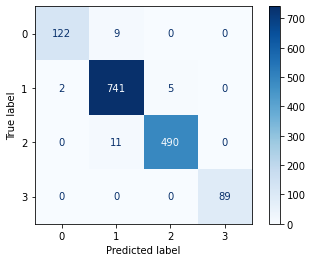

In [33]:
plt.figure(figsize=(15,10))
plot_confusion_matrix(clf, x_test, y_test,cmap='Blues')

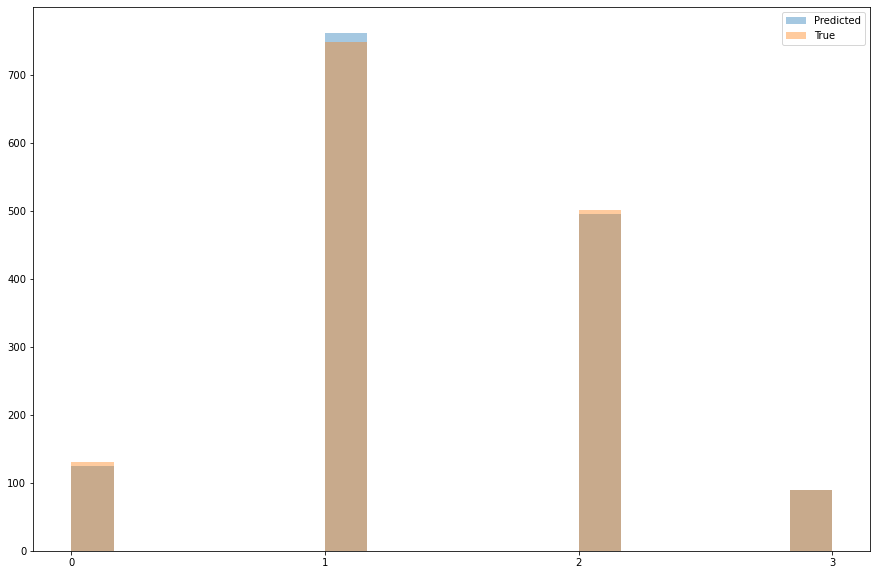

In [34]:
plt.figure(figsize=(15,10))
sns.distplot(pred, kde=False)
sns.distplot(y_test, kde=False)
plt.xticks([0,1,2,3])
plt.legend(labels=['Predicted', 'True'])

<B><H2>KNN</B></H2>

In [35]:
x_data=df.iloc[:,0:-1].values
xdf=df.iloc[:,0:-2]
y_data=df.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 1)
sc = StandardScaler()
scaler=MinMaxScaler(feature_range=(0,3))
y_test = y_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_test=scaler.fit_transform(y_test)
y_train=scaler.fit_transform(y_train)
y_train=np.around(y_train,0)
y_test=np.around(y_test,0)
y_train=y_train.astype(int)
y_test=y_test.astype(int)
y_train=y_train.flatten()
y_test=y_test.flatten() 
y_train

array([3, 2, 1, ..., 2, 0, 1])

In [36]:
from sklearn.neighbors import KNeighborsClassifier
Accuracy=[]
k=[]
maxacc=0
N=0
for i in range(2,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    pred=neigh.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print("Accuracy at ",i, " is ",acc)
    Accuracy.append(acc)
    k.append(i)
    if(acc>maxacc):
        maxacc=acc
        N=i

print("Score is",maxacc)
print("n= ",N)    

Accuracy at  2  is  0.9264805990469708
Accuracy at  3  is  0.9244383934649422
Accuracy at  4  is  0.9251191286589516
Accuracy at  5  is  0.9285228046289993
Accuracy at  6  is  0.9257998638529612
Accuracy at  7  is  0.9189925119128659
Accuracy at  8  is  0.9257998638529612
Accuracy at  9  is  0.9183117767188563
Accuracy at  10  is  0.9155888359428183
Accuracy at  11  is  0.9121851599727706
Accuracy at  12  is  0.9142273655547992
Accuracy at  13  is  0.9121851599727706
Accuracy at  14  is  0.9128658951667801
Accuracy at  15  is  0.910142954390742
Accuracy at  16  is  0.908781484002723
Accuracy at  17  is  0.9067392784206944
Accuracy at  18  is  0.9081007488087134
Accuracy at  19  is  0.9053778080326753
Accuracy at  20  is  0.89857045609258
Score is 0.9285228046289993
n=  5


([<matplotlib.axis.XTick at 0x7f0d1510cb50>,
 <a list of 20 Text major ticklabel objects>)

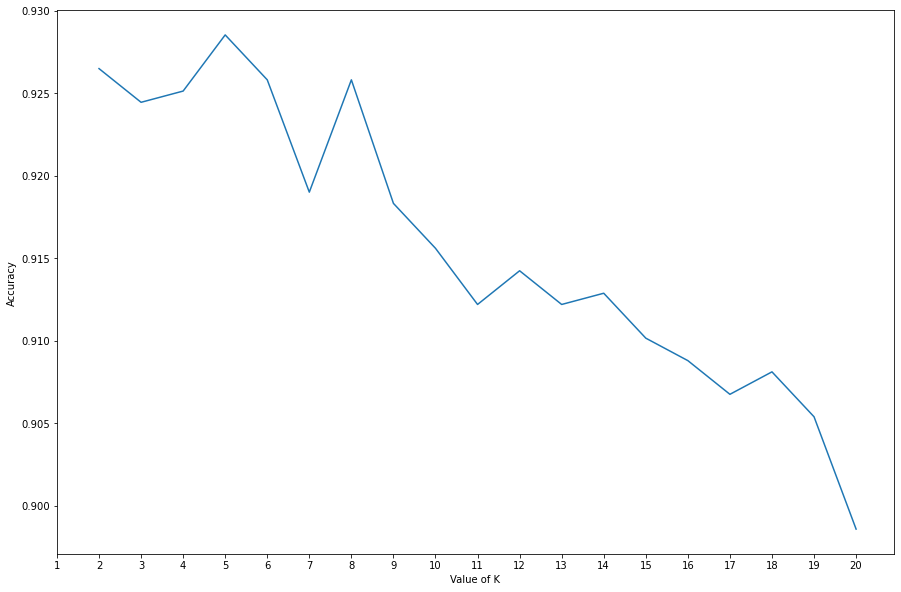

In [41]:
plt.figure(figsize=(15,10))
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.plot(k,Accuracy)
x_ticks =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x_ticks)

In [38]:
neigh2=KNeighborsClassifier(n_neighbors=N)
neigh2.fit(x_train,y_train)
pred=neigh2.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy at ",N, " is ",acc)

Accuracy at  5  is  0.9285228046289993


<Figure size 1080x720 with 0 Axes>

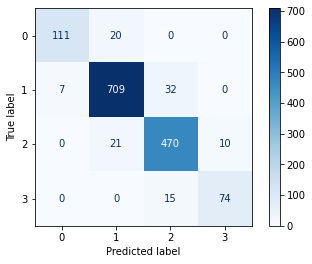

In [39]:
plt.figure(figsize=(15,10))
plot_confusion_matrix(neigh2, x_test, y_test, cmap='Blues')

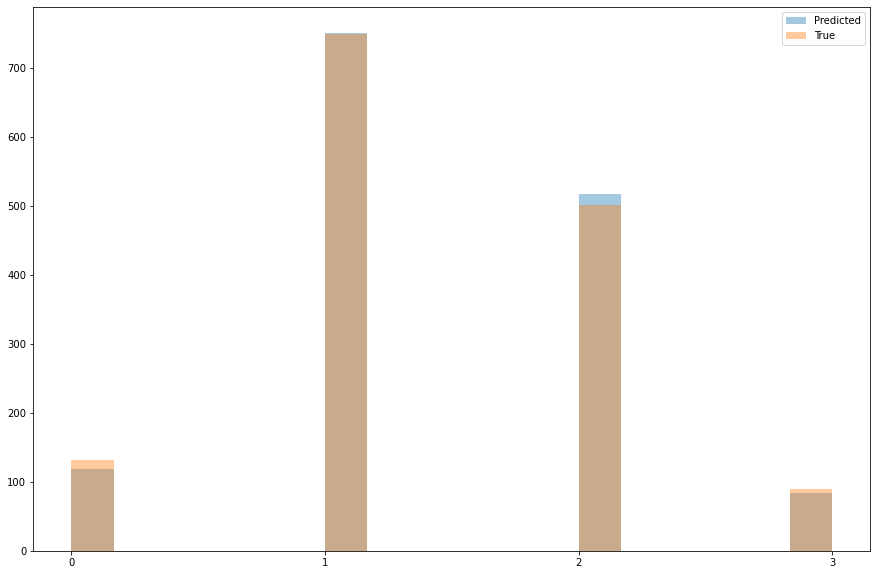

In [40]:
plt.figure(figsize=(15,10))
sns.distplot(pred, kde=False)
sns.distplot(y_test, kde=False)
plt.xticks([0,1,2,3])
plt.legend(labels=['Predicted', 'True'])

In [ ]:
#plt.figure(figsize=(15,10))
#sns.swarmplot(x=df1['age'].iloc[:4406],y=y_train, hue=df1['sex'][:4406])
#sns.swarmplot(x=df1['age'].iloc[4406:],y=y_test, hue=df1['sex'][4406:], palette=["r", "c"])

In [ ]:
x_train[.shape

In [ ]:
y_test.shape

In [ ]:
type(x_train)